In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

np.random.seed(42)

# load data

In [3]:
df1_ori=pd.read_csv('BBB_planA_monthly.csv', low_memory=False)

In [4]:
df1_ori

,final_result,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,id1
0,1,13.0,38.0,88.0,14.0,126.0,67.0,124.0,152.0,83.0,34.0,0
1,1,7.0,42.0,22.0,7.0,101.0,46.0,14.0,62.0,0.0,0.0,1
2,0,71.0,333.0,510.0,38.0,139.0,247.0,119.0,157.0,62.0,12.0,2
3,1,117.0,72.0,211.0,131.0,244.0,483.0,193.0,409.0,138.0,0.0,3
4,0,2.0,9.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
5336,1,64.0,95.0,62.0,74.0,73.0,48.0,56.0,70.0,89.0,0.0,5336
5337,0,32.0,74.0,159.0,81.0,38.0,15.0,75.0,23.0,56.0,0.0,5337
5338,1,562.0,675.0,770.0,756.0,856.0,374.0,425.0,218.0,206.0,0.0,5338
5339,0,0.0,27.0,29.0,75.0,1.0,9.0,64.0,17.0,43.0,0.0,5339


In [5]:
df1_sorted=df1_ori.sort_values(by=['id1'])
df1_sorted.head(10)

,final_result,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,id1
0,1,13.0,38.0,88.0,14.0,126.0,67.0,124.0,152.0,83.0,34.0,0
1,1,7.0,42.0,22.0,7.0,101.0,46.0,14.0,62.0,0.0,0.0,1
2,0,71.0,333.0,510.0,38.0,139.0,247.0,119.0,157.0,62.0,12.0,2
3,1,117.0,72.0,211.0,131.0,244.0,483.0,193.0,409.0,138.0,0.0,3
4,0,2.0,9.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
5,1,52.0,140.0,98.0,70.0,43.0,77.0,89.0,32.0,27.0,0.0,5
6,1,27.0,138.0,127.0,35.0,53.0,43.0,69.0,37.0,11.0,61.0,6
7,1,0.0,78.0,148.0,49.0,44.0,68.0,39.0,15.0,78.0,0.0,7
8,1,169.0,642.0,579.0,97.0,160.0,44.0,79.0,128.0,53.0,34.0,8
9,0,0.0,11.0,24.0,0.0,13.0,16.0,72.0,20.0,5.0,0.0,9


In [6]:
df1_sorted.info() # final_result  is an object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 5340
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   final_result  5341 non-null   int64  
 1   T0            5341 non-null   float64
 2   T1            5341 non-null   float64
 3   T2            5341 non-null   float64
 4   T3            5341 non-null   float64
 5   T4            5341 non-null   float64
 6   T5            5341 non-null   float64
 7   T6            5341 non-null   float64
 8   T7            5341 non-null   float64
 9   T8            5341 non-null   float64
 10  T9            5341 non-null   float64
 11  id1           5341 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 542.4 KB


# prepare dataset for y

In [7]:
y = df1_sorted['final_result']

In [8]:
print(y) # df_label is a collection of t: 12 activities * 5341 students = 64,092 rows

0       1
1       1
2       0
3       1
4       0
       ..
5336    1
5337    0
5338    1
5339    0
5340    1
Name: final_result, Length: 5341, dtype: int64


In [9]:
print(type(y))

<class 'pandas.core.series.Series'>


# prepare dataset for X

In [10]:
X = df1_sorted.drop(['final_result','id1'], axis=1)

In [11]:
X.head()

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,13.0,38.0,88.0,14.0,126.0,67.0,124.0,152.0,83.0,34.0
1,7.0,42.0,22.0,7.0,101.0,46.0,14.0,62.0,0.0,0.0
2,71.0,333.0,510.0,38.0,139.0,247.0,119.0,157.0,62.0,12.0
3,117.0,72.0,211.0,131.0,244.0,483.0,193.0,409.0,138.0,0.0
4,2.0,9.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
df_col.shape

(5341, 10)

# create X and y (7:3)

5341 students * 0.7 = 3738 students

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
print("xtrain:",X_train.shape)
print("ytrain:",y_train.shape)
print("xtest:",X_test.shape)
print("ytest:",y_test.shape)


xtrain: (3738, 10)
ytrain: (3738,)
xtest: (1603, 10)
ytest: (1603,)


# reshape X and y

In [14]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_test.shape[0])
print(X_test.shape[1])

3738
10
1603
10


In [15]:
X_train_reshaped=X_train.values.reshape((X_train.shape[0], X_train.shape[1] ))
X_test_reshaped=X_test.values.reshape((X_test.shape[0],X_test.shape[1]))

y_train_reshaped=y_train.values.reshape((y_train.shape[0],1 ))
y_test_reshaped=y_test.values.reshape((y_test.shape[0],1))

In [16]:
print("xtrain_reshaped:", X_train_reshaped.shape)
print("xtrain_reshaped:", type(X_train_reshaped))
print("xtest_reshaped:", X_test_reshaped.shape)
print("xtest_reshaped:", type(X_test_reshaped))


xtrain_reshaped: (3738, 10)
xtrain_reshaped: <class 'numpy.ndarray'>
xtest_reshaped: (1603, 10)
xtest_reshaped: <class 'numpy.ndarray'>


In [17]:
print("ytrain_reshaped:", y_train_reshaped.shape)
print("ytrain_reshaped:", type(y_train_reshaped))
print("ytest_reshaped:", y_test_reshaped.shape)
print("ytest_reshaped:", type(y_test_reshaped))

ytrain_reshaped: (3738, 1)
ytrain_reshaped: <class 'numpy.ndarray'>
ytest_reshaped: (1603, 1)
ytest_reshaped: <class 'numpy.ndarray'>


# MinMaxScaler

In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train_reshaped)
X_test_scaled = min_max_scaler.fit_transform(X_test_reshaped)

# reshape X again 

In [19]:
X_train_reshaped2=X_train_scaled.reshape((X_train_scaled.shape[0],10,1))
X_test_reshaped2=X_test_scaled.reshape((X_test_scaled.shape[0],10,1))

In [20]:
print("xtrain_reshaped2:", X_train_reshaped2.shape)
print("xtrain_reshaped2:", type(X_train_reshaped2))
print("xtest_reshaped2:", X_test_reshaped2.shape)
print("xtest_reshaped2:", type(X_test_reshaped2))

xtrain_reshaped2: (3738, 10, 1)
xtrain_reshaped2: <class 'numpy.ndarray'>
xtest_reshaped2: (1603, 10, 1)
xtest_reshaped2: <class 'numpy.ndarray'>


# the final X and y for modelling

In [21]:
X_train1 = X_train_reshaped2
X_test1 = X_test_reshaped2
y_train1 = y_train_reshaped
y_test1 = y_test_reshaped

# -----------------The second file-------------------

In [22]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, Masking, Dropout
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

In [26]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(3738, 10, 1)
(1603, 10, 1)
(3738, 1)
(1603, 1)


In [27]:
batch_size = 128

In [91]:
## LSTM:80/60
        
lr=0.01
epochs=100

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(50, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.3097 - accuracy: 0.8815 (LSTM:80/60) (lr=0.01, epochs=100)

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(50, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.3099 - accuracy: 0.8865 (lr=0.01, epochs=60)

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(50, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.3351 - accuracy: 0.8821 (lr=0.01, epochs=200)

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(50, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.2960 - accuracy: 0.8890 (lr=0.01, epochs=100) -->best

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(50, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.3091 - accuracy: 0.8858 (lr=0.001, epochs=100)

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(50, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

In [92]:
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 10, 80)            26240     
                                                                 
 lstm_25 (LSTM)              (None, 50)                26200     
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 52,491
Trainable params: 52,491
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
history_model = model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=epochs, batch_size=batch_size)

Epoch 1/100
30/30 [==============================] - 4s 40ms/step - loss: 0.5935 - accuracy: 0.7033 - val_loss: 0.5797 - val_accuracy: 0.7024
Epoch 2/100
30/30 [==============================] - 1s 19ms/step - loss: 0.5237 - accuracy: 0.7453 - val_loss: 0.4533 - val_accuracy: 0.7991
Epoch 3/100
30/30 [==============================] - 1s 19ms/step - loss: 0.4563 - accuracy: 0.7857 - val_loss: 0.3714 - val_accuracy: 0.8472
Epoch 4/100
30/30 [==============================] - 1s 20ms/step - loss: 0.3940 - accuracy: 0.8432 - val_loss: 0.3951 - val_accuracy: 0.8490
Epoch 5/100
30/30 [==============================] - ETA: 0s - loss: 0.4001 - accuracy: 0.83 - 1s 19ms/step - loss: 0.3971 - accuracy: 0.8379 - val_loss: 0.3311 - val_accuracy: 0.8677
Epoch 6/100
30/30 [==============================] - 1s 19ms/step - loss: 0.3800 - accuracy: 0.8515 - val_loss: 0.3142 - val_accuracy: 0.8865
Epoch 7/100
30/30 [==============================] - 1s 19ms/step - loss: 0.3595 - accuracy: 0.8561 - val_

30/30 [==============================] - 1s 19ms/step - loss: 0.3357 - accuracy: 0.8729 - val_loss: 0.3161 - val_accuracy: 0.8746
Epoch 59/100
30/30 [==============================] - 1s 19ms/step - loss: 0.3315 - accuracy: 0.8740 - val_loss: 0.3006 - val_accuracy: 0.8871
Epoch 60/100
30/30 [==============================] - 1s 18ms/step - loss: 0.3323 - accuracy: 0.8657 - val_loss: 0.3028 - val_accuracy: 0.8896
Epoch 61/100
30/30 [==============================] - 1s 19ms/step - loss: 0.3314 - accuracy: 0.8735 - val_loss: 0.3294 - val_accuracy: 0.8684
Epoch 62/100
30/30 [==============================] - 1s 18ms/step - loss: 0.3323 - accuracy: 0.8681 - val_loss: 0.2943 - val_accuracy: 0.8921
Epoch 63/100
30/30 [==============================] - 1s 19ms/step - loss: 0.3343 - accuracy: 0.8719 - val_loss: 0.2991 - val_accuracy: 0.8908
Epoch 64/100
30/30 [==============================] - 1s 19ms/step - loss: 0.3302 - accuracy: 0.8737 - val_loss: 0.3340 - val_accuracy: 0.8665
Epoch 65/100

In [94]:
history_model.params

{'verbose': 1, 'epochs': 100, 'steps': 30}

In [95]:
model.evaluate(X_test1, y_test1)

51/51 [==============================] - 0s 3ms/step - loss: 0.3097 - accuracy: 0.8815


[0.3097144365310669, 0.8814722299575806]

# plot MLP learning process

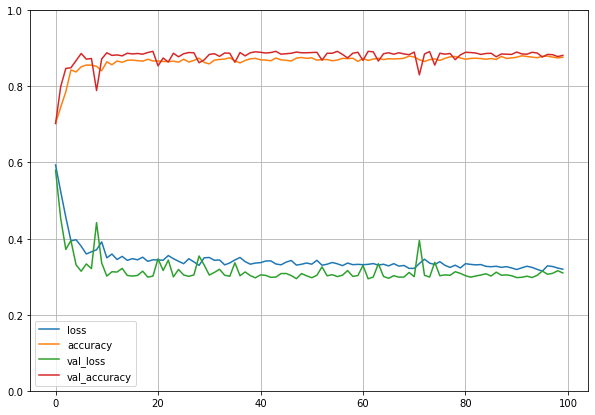

In [96]:
import matplotlib.pyplot as plt

pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##  loss: 0.3046 - accuracy: 0.8858 (lr=0.01, epochs=100)

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(40, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.3098 - accuracy: 0.8840 (lr=0.001, epochs=100)

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(40, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4120 - accuracy: 0.8222 (lr=0.0001, epochs=100)

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(40, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])